In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import tqdm

In [23]:
df_train = pd.read_csv('SectionC_dataset/fashion-mnist_train.csv')[:8000]
df_test = pd.read_csv('SectionC_dataset/fashion-mnist_test.csv')[:2000]
df_val = pd.read_csv('SectionC_dataset/fashion-mnist_train.csv')[8001:10001]


# 1

In [24]:
df_test.isnull().values.any()  # no NULL values in the df_train
df_train.isnull().values.any()  # no NULL values in the df_test
df_val.isnull().values.any()  # no NULL values in the df_val


False

In [25]:
df_test.columns

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)

In [26]:
df_train.shape, df_test.shape, df_val.shape

((8000, 785), (2000, 785), (2000, 785))

Visualization

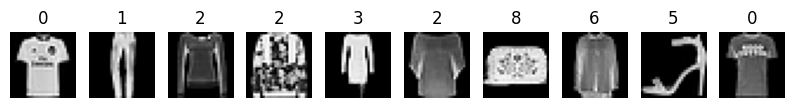

In [27]:
import matplotlib.pyplot as plt
import numpy as np

def plot_samples(df, num_samples=10):
    plt.figure(figsize=(10, 10))
    for i in range(num_samples):
        img = df.iloc[i, 1:].values
        label = df.iloc[i]['label'] 
        img = img.reshape(28, 28)
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(label)
        plt.axis('off')
    plt.show()

plot_samples(df_test, num_samples=10)


# 2

In [28]:
df_train.columns

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)

In [29]:
scaler = MinMaxScaler()

Y_train = df_train['label']
X_train = df_train.drop('label', axis=1)



Y_test = df_test['label']
X_test = df_test.drop('label', axis=1)

Y_val = df_val['label']
X_val = df_val.drop('label', axis=1)


scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)




In [30]:
X_test.shape, Y_test.shape, X_train.shape, Y_train.shape, X_val.shape, Y_val.shape

((2000, 784), (2000,), (8000, 784), (8000,), (2000, 784), (2000,))

In [31]:
def loss_plot(training_loss,validation_loss,activation_function):
    plt.plot(training_loss, label='Training Loss')
    plt.plot(validation_loss, label='Validation Loss')
    plt.title(f'Loss vs Epoch for {activation_function}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [32]:
from sklearn.metrics import log_loss
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

from sklearn.metrics import classification_report

def mlp_train(batch_size,activation_function,iterations,hidden_layers, X_train, Y_train, X_test, Y_test, X_val, Y_val):
    # iterations = 100
    solver = 'adam'
    # batch_size = 128
    learning_rate = 2e-5
    mlp = MLPClassifier(hidden_layer_sizes=hidden_layers, 
                        max_iter=1, 
                        solver=solver, 
                        batch_size=batch_size, 
                        learning_rate_init=learning_rate,
                        activation=activation_function,
                        warm_start=True,
                        random_state=42
                        )
    
    
    training_loss = []
    validation_loss = []
    # for i in range(iterations):
    for i in tqdm.tqdm(range(iterations)):
        # print(f'Iteration {i + 1}/{iterations}')
        # warnings.filterwarnings("ignore", category=ConvergenceWarning)
        mlp.fit(X_train, Y_train)
        training_loss.append(mlp.loss_)
        y_pred_prob = mlp.predict_proba(X_val) 
        val_loss = log_loss(Y_val, y_pred_prob)
        validation_loss.append(val_loss)
    loss_plot(training_loss, validation_loss,activation_function)
    #print accuracy
    print(f'Accuracy: {mlp.score(X_test, Y_test)}')

    print(classification_report(Y_test, mlp.predict(X_test)))
    
    
        # print(training_loss, validation_loss)
    # mlp.fit(X_train, Y_train)
    return mlp


100%|██████████| 100/100 [01:04<00:00,  1.56it/s]


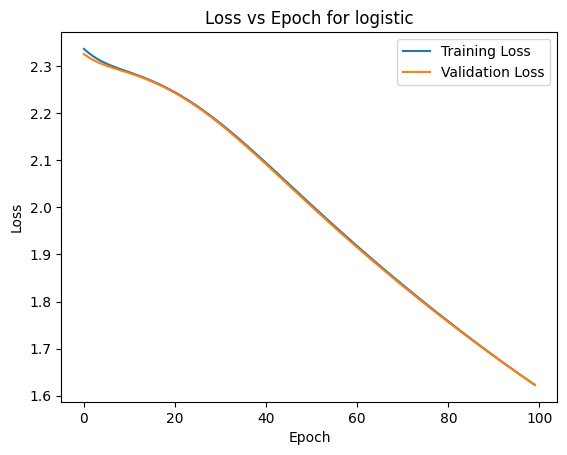

c:\Users\SAUMIL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\SAUMIL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\SAUMIL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

Accuracy: 0.4405
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       195
           1       0.44      0.96      0.60       189
           2       0.32      0.59      0.42       205
           3       0.20      0.20      0.20       200
           4       0.33      0.08      0.13       199
           5       0.00      0.00      0.00       202
           6       0.27      0.24      0.26       213
           7       0.49      0.98      0.65       204
           8       0.94      0.76      0.84       188
           9       0.61      0.64      0.62       205

    accuracy                           0.44      2000
   macro avg       0.36      0.44      0.37      2000
weighted avg       0.36      0.44      0.37      2000



100%|██████████| 100/100 [01:05<00:00,  1.52it/s]


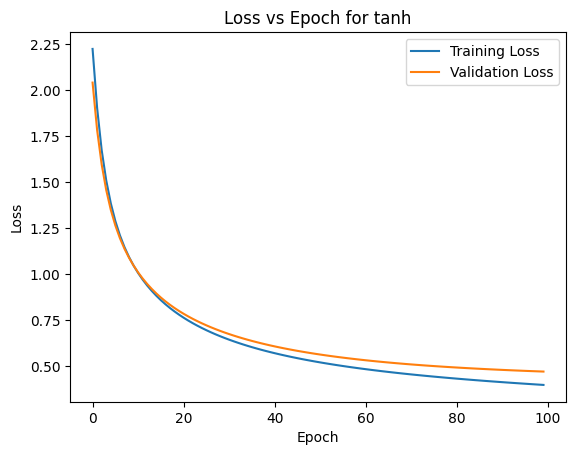

Accuracy: 0.8345
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       195
           1       0.98      0.95      0.96       189
           2       0.75      0.72      0.73       205
           3       0.83      0.88      0.85       200
           4       0.73      0.80      0.77       199
           5       0.94      0.88      0.91       202
           6       0.67      0.55      0.61       213
           7       0.88      0.87      0.87       204
           8       0.93      0.95      0.94       188
           9       0.86      0.94      0.90       205

    accuracy                           0.83      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.83      0.83      0.83      2000



100%|██████████| 100/100 [00:52<00:00,  1.91it/s]


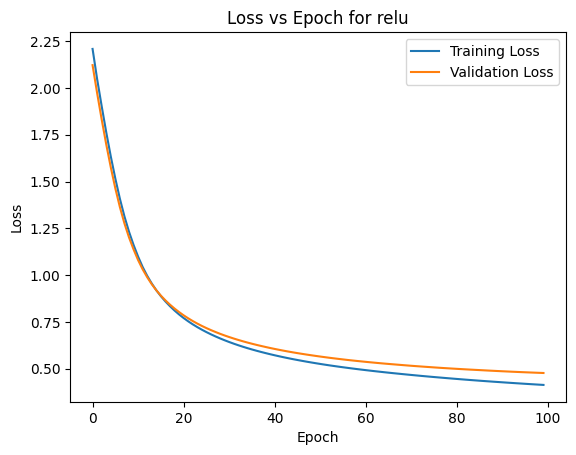

Accuracy: 0.837
              precision    recall  f1-score   support

           0       0.78      0.84      0.80       195
           1       0.98      0.94      0.96       189
           2       0.75      0.71      0.73       205
           3       0.85      0.88      0.87       200
           4       0.72      0.79      0.76       199
           5       0.96      0.88      0.92       202
           6       0.67      0.60      0.63       213
           7       0.88      0.89      0.89       204
           8       0.94      0.93      0.93       188
           9       0.87      0.94      0.90       205

    accuracy                           0.84      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.84      0.84      0.84      2000



100%|██████████| 100/100 [00:50<00:00,  1.98it/s]


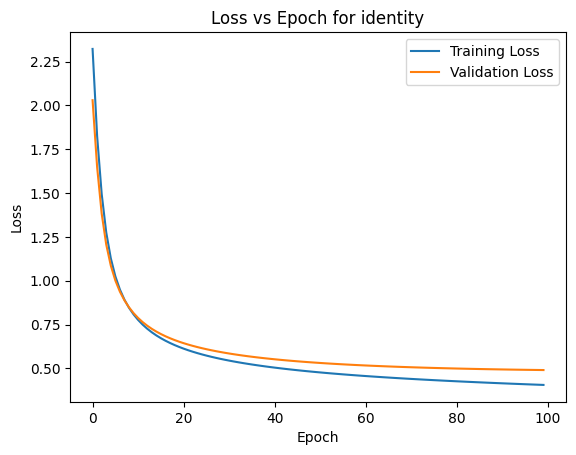

Accuracy: 0.829
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       195
           1       0.98      0.96      0.97       189
           2       0.74      0.73      0.73       205
           3       0.85      0.88      0.86       200
           4       0.70      0.77      0.73       199
           5       0.92      0.88      0.90       202
           6       0.64      0.55      0.59       213
           7       0.89      0.87      0.88       204
           8       0.94      0.93      0.93       188
           9       0.87      0.94      0.90       205

    accuracy                           0.83      2000
   macro avg       0.83      0.83      0.83      2000
weighted avg       0.83      0.83      0.83      2000



In [33]:

layers = [128,64,32]
activation_functions = ['logistic', 'tanh', 'relu', 'identity']


for activation in activation_functions:
    mlp_train(128,activation, 100, layers,X_train, Y_train, X_test, Y_test, X_val, Y_val)

# 3

relu is the best activation function with accuracy: 0.837


In [ ]:

# Define the parameter grid for the best activation function 'relu'
param_grid = {
    'activation': ['relu'],  # Fixed as relu
    'solver': ['adam', 'sgd', 'lbfgs'],  # Optimizers to try
    'batch_size': [64, 128, 256],  # Batch sizes,
    'learning_rate_init': [2e-5, 2e-6, 2e-7],
    'max_iter': [50,100,200]
    
}

# Initialize the MLPClassifier with relu activation
mlp = MLPClassifier(activation='relu', random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# # Fit the grid search to the training data
grid_search.fit(X_train, Y_train)

# # Get the best hyperparameters from GridSearchCV
best_params = grid_search.best_params_
print(f"Best hyperparameters for relu activation: {best_params}")

# # Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# # Evaluate the best model on the test set
accuracy = best_model.score(X_test, Y_test)
print(f"Accuracy of the best model: {accuracy}")


# 4

In [38]:
#mlp regressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


def mlp_regressor_train(hidden_layers,iterations,activation_function, X_train, Y_train, X_test, Y_test, X_val, Y_val):
    solver = 'adam'
    batch_size = 128
    learning_rate = 2e-5
    mlp = MLPRegressor(hidden_layer_sizes=hidden_layers, 
                        max_iter=1, 
                        solver=solver, 
                        batch_size=batch_size, 
                        learning_rate_init=learning_rate,
                        activation=activation_function,
                        warm_start=True,
                        random_state=42
                        )
    
    
    training_loss = []
    validation_loss = []
    # for i in range(iterations):
    for i in tqdm.tqdm(range(iterations)):
        # print(f'Iteration {i + 1}/{iterations}')
        # warnings.filterwarnings("ignore", category=ConvergenceWarning)
        mlp.fit(X_train, Y_train)
        training_loss.append(mlp.loss_)
        y_pred_prob = mlp.predict(X_val)  # Get predicted probabilities for validation set
        val_loss = mean_squared_error(Y_val, y_pred_prob)
        validation_loss.append(val_loss)
    loss_plot(training_loss, validation_loss,activation_function)

    # give classification report
    y_pred = mlp.predict(X_test)

    #print r2 score
    # print(f'R2 Score: {mlp.score(X_test, Y_test)}')
    
    return mlp




100%|██████████| 100/100 [01:54<00:00,  1.15s/it]


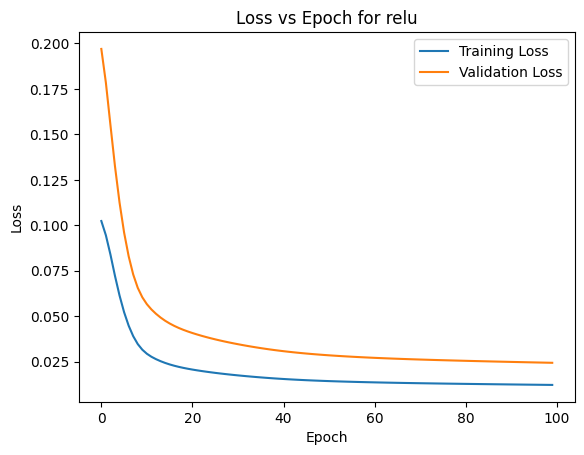

100%|██████████| 100/100 [01:53<00:00,  1.13s/it]


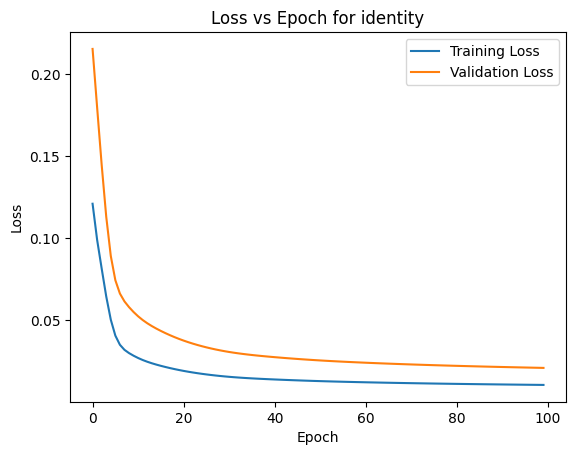

In [39]:
hidden_layers = [128,64,32,64,128]
mlp_regr_relu = mlp_regressor_train(hidden_layers,100,'relu', X_train, X_train, X_test, X_test, X_val, X_val)
mlp_regr_identity = mlp_regressor_train(hidden_layers,100,'identity', X_train, X_train, X_test, X_test, X_val, X_val)


In [ ]:

def plot_generated_images(original, generated, activation):
    fig, axes = plt.subplots(2, 10, figsize=(20, 4))
    for i in range(10):
        axes[0, i].imshow(original[i].reshape(28, 28), cmap='gray')
        axes[0, i].axis('off')
        
        axes[1, i].imshow(generated[i].reshape(28, 28), cmap='gray')
        axes[1, i].axis('off')

    plt.suptitle(f'Original vs Gen_Images ({activation})')
    plt.show()


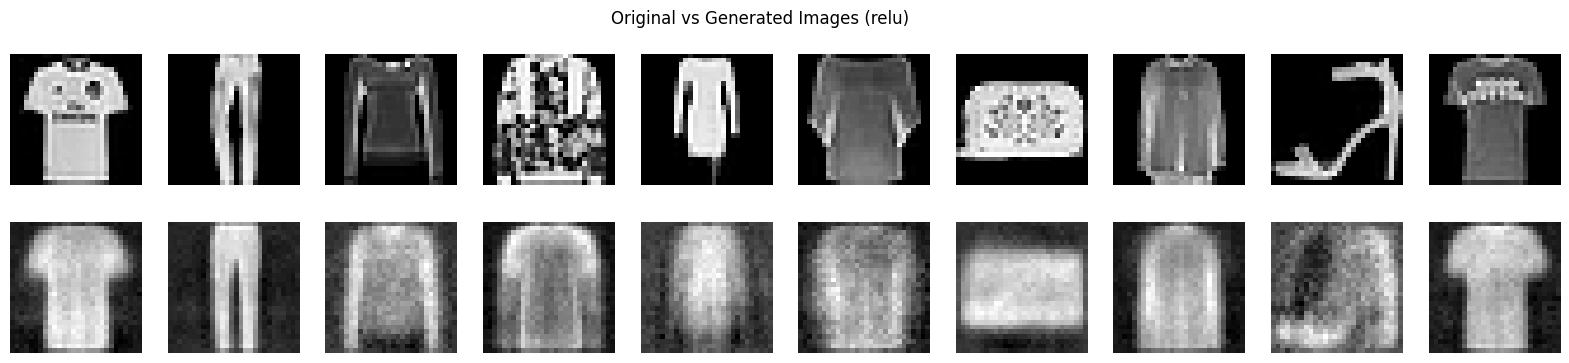

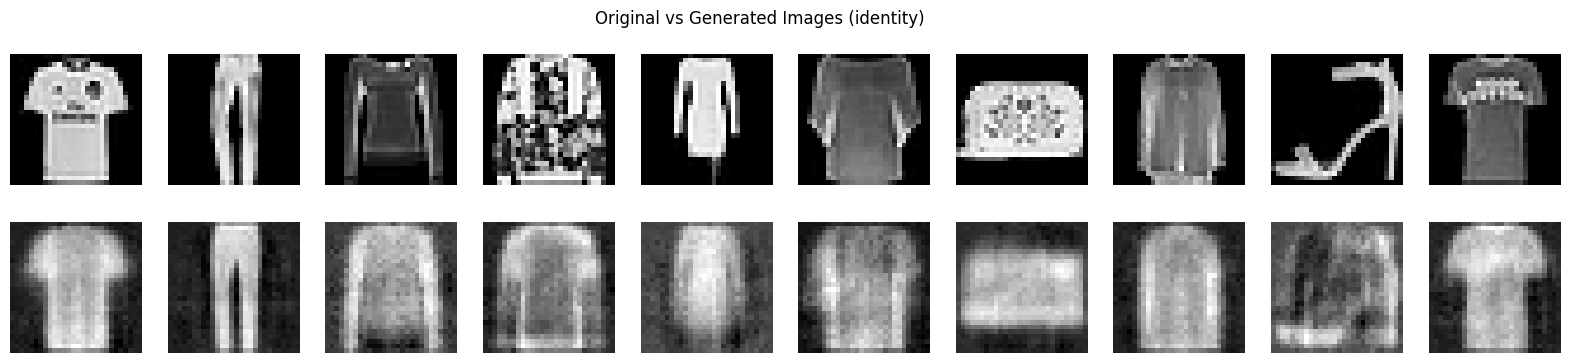

In [ ]:
# Generate and visualize outputs for 10 test samples
generated_relu = mlp_regr_relu.predict(X_test[:10])  # Prediction from ReLU model
generated_identity = mlp_regr_identity.predict(X_test[:10])  # Prediction from Identity model

# Call the visualization function with the first 10 test samples
plot_generated_images(X_test[:10], generated_relu, 'relu')
plot_generated_images(X_test[:10], generated_identity, 'identity')


# 5

In [ ]:

# def extract_features(model, data):
#     activations = data
#     for layer in range(3): 
#         weights = model.coefs_[layer]
#         biases = model.intercepts_[layer]
#         activations = np.maximum(0, np.dot(activations, weights) + biases)
#     return activations


# X_train_features_relu = extract_features(mlp_regr_relu, X_train)
# X_test_features_relu = extract_features(mlp_regr_relu, X_test)
# X_val_features_relu = extract_features(mlp_regr_relu, X_val)

# X_train_features_identity = extract_features(mlp_regr_identity, X_train)
# X_test_features_identity = extract_features(mlp_regr_identity, X_test)
# X_val_features_identity = extract_features(mlp_regr_identity, X_val)


In [50]:

def extract_features(model, data, activation_function):
    activations = data
    for layer in range(3): 
        weights = model.coefs_[layer]
        biases = model.intercepts_[layer]
        if(activation_function == 'relu'):
            activations = np.maximum(0, np.dot(activations, weights) + biases)
        else:
            activations = np.dot(activations, weights) + biases
    return activations


X_train_features_relu = extract_features(mlp_regr_relu, X_train, 'relu')
X_test_features_relu = extract_features(mlp_regr_relu, X_test,  'relu')
X_val_features_relu = extract_features(mlp_regr_relu, X_val,  'relu')

X_train_features_identity = extract_features(mlp_regr_identity, X_train,'identity')
X_test_features_identity = extract_features(mlp_regr_identity, X_test,'identity')
X_val_features_identity = extract_features(mlp_regr_identity, X_val,'identity')


In [51]:
X_train_features_identity.shape, X_test_features_identity.shape, X_val_features_identity.shape

((8000, 32), (2000, 32), (2000, 32))

100%|██████████| 200/200 [00:05<00:00, 39.08it/s]


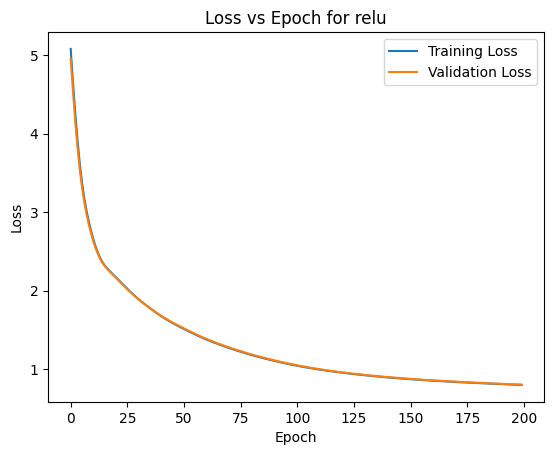

Accuracy: 0.7015
              precision    recall  f1-score   support

           0       0.71      0.80      0.75       195
           1       0.97      0.89      0.93       189
           2       0.52      0.57      0.55       205
           3       0.74      0.86      0.80       200
           4       0.56      0.60      0.58       199
           5       0.93      0.31      0.46       202
           6       0.52      0.34      0.41       213
           7       0.67      0.88      0.76       204
           8       0.89      0.89      0.89       188
           9       0.69      0.91      0.79       205

    accuracy                           0.70      2000
   macro avg       0.72      0.71      0.69      2000
weighted avg       0.72      0.70      0.69      2000



100%|██████████| 200/200 [00:04<00:00, 45.06it/s]


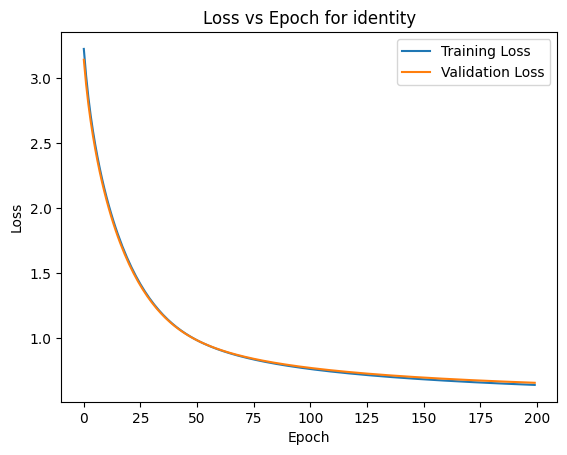

Accuracy: 0.7765
              precision    recall  f1-score   support

           0       0.78      0.79      0.79       195
           1       0.96      0.94      0.95       189
           2       0.66      0.62      0.64       205
           3       0.81      0.87      0.84       200
           4       0.65      0.71      0.68       199
           5       0.88      0.73      0.80       202
           6       0.53      0.47      0.50       213
           7       0.79      0.85      0.82       204
           8       0.90      0.90      0.90       188
           9       0.84      0.91      0.87       205

    accuracy                           0.78      2000
   macro avg       0.78      0.78      0.78      2000
weighted avg       0.78      0.78      0.77      2000



In [52]:
hidden_layers = [32,32]   # a is 32
batch_size = 128
feature_mlp_relu = mlp_train(batch_size,'relu',200,hidden_layers, X_train_features_relu, Y_train, X_test_features_relu, Y_test, X_val_features_relu, Y_val)
feature_mlp_identity = mlp_train(batch_size,'identity',200,hidden_layers, X_train_features_identity, Y_train, X_test_features_identity, Y_test, X_val_features_identity, Y_val)
